<a href="https://colab.research.google.com/github/fahadrajput99/deep-learning/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import sys
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.test.is_built_with_cuda()

True

In [7]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

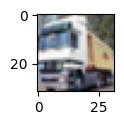

In [11]:
plot_sample(1)

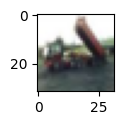

In [12]:
plot_sample(2)

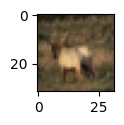

In [13]:
plot_sample(3)

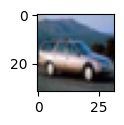

In [14]:
plot_sample(4)

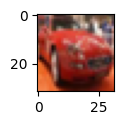

In [15]:
plot_sample(5)

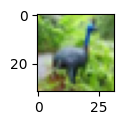

In [16]:
plot_sample(6)

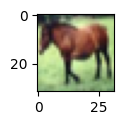

In [17]:
plot_sample(7)

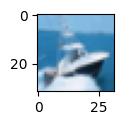

In [18]:
plot_sample(8)

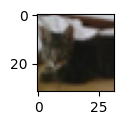

In [19]:
plot_sample(9)

In [20]:
classes=["truck" , "truck" , "deer" , "automobile" , "automobile" , "frog" , "horse" , "ship" , "cat"]

In [21]:
y_train[3]

array([4], dtype=uint8)

In [22]:
classes[y_train[6][0]]

'deer'

In [23]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [24]:
x_test_scaled

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [25]:
y_train_catagorical=keras.utils.to_categorical(
    y_train , num_classes=10 , dtype='float32'
)
y_train_catagorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_test_catagorical=keras.utils.to_categorical(
    y_test , num_classes=10 , dtype='float32'
)

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [37]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000 , activation='relu'),
    keras.layers.Dense(2000 , activation='relu'),
    keras.layers.Dense(1000 , activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')
])
model.compile(optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_scaled, y_train_catagorical, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8109 - accuracy: 0.3535
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6169 - accuracy: 0.4283
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5281 - accuracy: 0.4569
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4633 - accuracy: 0.4813
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4125 - accuracy: 0.4995
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3620 - accuracy: 0.5184
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3197 - accuracy: 0.5370
Epoch 8/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2812 - accuracy: 0.5470
Epoch 9/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2410 - accuracy: 0.5622
Epoch 10/100
1563/1563 [==============================] - 10s 6ms/

In [36]:
model.evaluate(x_test_scaled , y_test_catagorical)

313/313 [==============================] - 1s 3ms/step - loss: 2.1262 - accuracy: 0.5859


[2.1262366771698, 0.5859000086784363]